<a href="https://colab.research.google.com/github/sara-alaa634/Supermarket-Sales-Analysis/blob/main/Supermarket_Sales_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.data as pld
# importing matplotlib
import matplotlib.pyplot as plt

# display plots in the notebook itself
%matplotlib inline

In [2]:
table = pd.read_csv("supermarket_sales - Sheet1.csv")

In [3]:
table.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Questions we need to know from this data


1.   total rating for each product line
2.   for each product line the percentage of female and male used it
3.   quantity of each product line payed in each city
4.   quantity of each product line payed in each branch
5.   percentage of male and females in our website






In [4]:
px.pie(table, names='Gender', title='percentage of male and females in our website')

In [5]:
#px.bar(table, x='Product line', y='Rating', title='Total bill per day')

px.bar(
    table.groupby('Product line', as_index=False).sum(),
    x='Product line',
    y='Rating',
    title='total number of customers rating for each product line'
)

<ipython-input-5-c7908b1edd51>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [6]:
fig = px.sunburst(table, path=['Product line', 'Gender'], title='for each product line the percentage of female and male used it')
fig.update_traces(textinfo="label+percent parent")
fig.show()

In [7]:
px.sunburst(table, path=['Branch', 'Product line'], values='Quantity', title='quantity of each product line payed in each branch')




In [8]:
!pip install -q dash dash_bootstrap_components jupyter_dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.9 MB/s eta 0:00:00


In [9]:
from dash import Dash, dcc, html
import dash_bootstrap_components as dbc
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output, State

In [10]:
#table = pld.table()


Gender_chart = px.pie(table, names='Gender', title='percentage of male and females in our website')

total_rating_bar = px.bar(
    table.groupby('Product line', as_index=False).sum(),
    x='Product line',
    y='Rating',
    title='total number of customers rating for each product line'
)

fig = px.sunburst(table, path=['Product line', 'Gender'], title='for each product line the percentage of female and male used it')
fig.update_traces(textinfo="label+percent parent")
fig.show()


Quantity_per_product_per_branch_pie = px.sunburst(table, path=['Branch', 'Product line'], values='Quantity', title='quantity of each product line payed in each branch')




<ipython-input-10-64604133e36c>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [11]:
sizes =[2, 3, 4, 1, 6, 5]


In [12]:
Gender_chart = dcc.Graph(
    id='Gender_chart',
    figure=Gender_chart
)
total_rating_bar = dcc.Graph(
    id='total_rating_bar',
    figure=total_rating_bar
)
fig = dcc.Graph(
    id='fig',
    figure=fig
)
Quantity_per_product_per_branch_pie = dcc.Graph(
    id='Quantity_per_product_per_branch_pie',
    figure=Quantity_per_product_per_branch_pie
)


size_selector = dcc.Dropdown(
    id='size_selector',
    options=sizes,
    multi=True,
    value=[],
    placeholder='Filter by group size'
)

app = JupyterDash('Basic Dash Dashboard',
                  external_stylesheets=[dbc.themes.BOOTSTRAP],
                  title="Plotly Tips Dashboard"
)

app.layout = dbc.Container(
    [
     dbc.Row(
         [
          dbc.Col(html.H1('Tips Dashboard Analysis'))
         ]
     ),
     dbc.Row(
         [
          dbc.Row(
              [
               dbc.Col(size_selector)
              ],
              className='my-2'
          ),
          dbc.Row(
              [
               dbc.Col(dbc.Card(Gender_chart), md=8),
               dbc.Col(dbc.Card(total_rating_bar), md=4),
              ]
          )
         ],
         className='my-3'
     ),
     dbc.Row(
         [
          dbc.Col(dbc.Card(fig), md=4),
          dbc.Col(dbc.Card(Quantity_per_product_per_branch_pie), md=8),
         ]
     )
    ]
)
@app.callback(
    [
     Output('Gender_chart', 'figure'),
     Output('total_rating_bar', 'figure'),
    ],
    Input('size_selector', 'value'),
)
def update_pies(selected_sizes):
    if selected_sizes == None or len(selected_sizes) == 0:
        return [Gender_chart, total_rating_bar, ]

#======Ask about==================
    # filtered_tips = table[table['size'].isin(selected_sizes)]

    # new_sex_pie = px.pie(filtered_tips, names='sex', title='Female vs. Male visitors')

    # new_time_sex_tip_sunburst = px.sunburst(filtered_tips, path=['time', 'sex'], values='tip', title='Gender Total tip per time of day')
    # new_time_sex_tip_sunburst = new_time_sex_tip_sunburst.update_traces(textinfo="label+percent parent")

    # new_day_sex_total_bill_sunburst = px.sunburst(filtered_tips, path=['day', 'sex'], values='total_bill', title='Gender Total bill per day')
    # new_day_sex_total_bill_sunburst = new_day_sex_total_bill_sunburst.update_traces(textinfo="label+percent parent")

    # return [new_sex_pie, new_time_sex_tip_sunburst, new_day_sex_total_bill_sunburst]

app.run_server(debug=True)

/usr/local/lib/python3.10/dist-packages/dash/dash.py:516: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

Dash app running on:


<IPython.core.display.Javascript object>

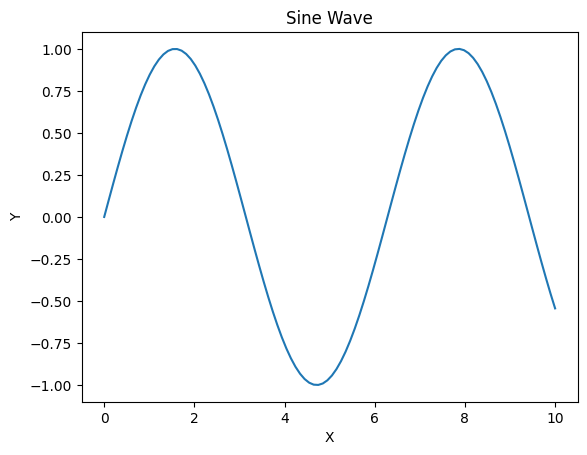

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the data on the axis
ax.plot(x, y)

# Add a title and axis labels
ax.set_title("Sine Wave")
ax.set_xlabel("X")
ax.set_ylabel("Y")

# Display the plot
plt.show()